In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

# Via SKlearn
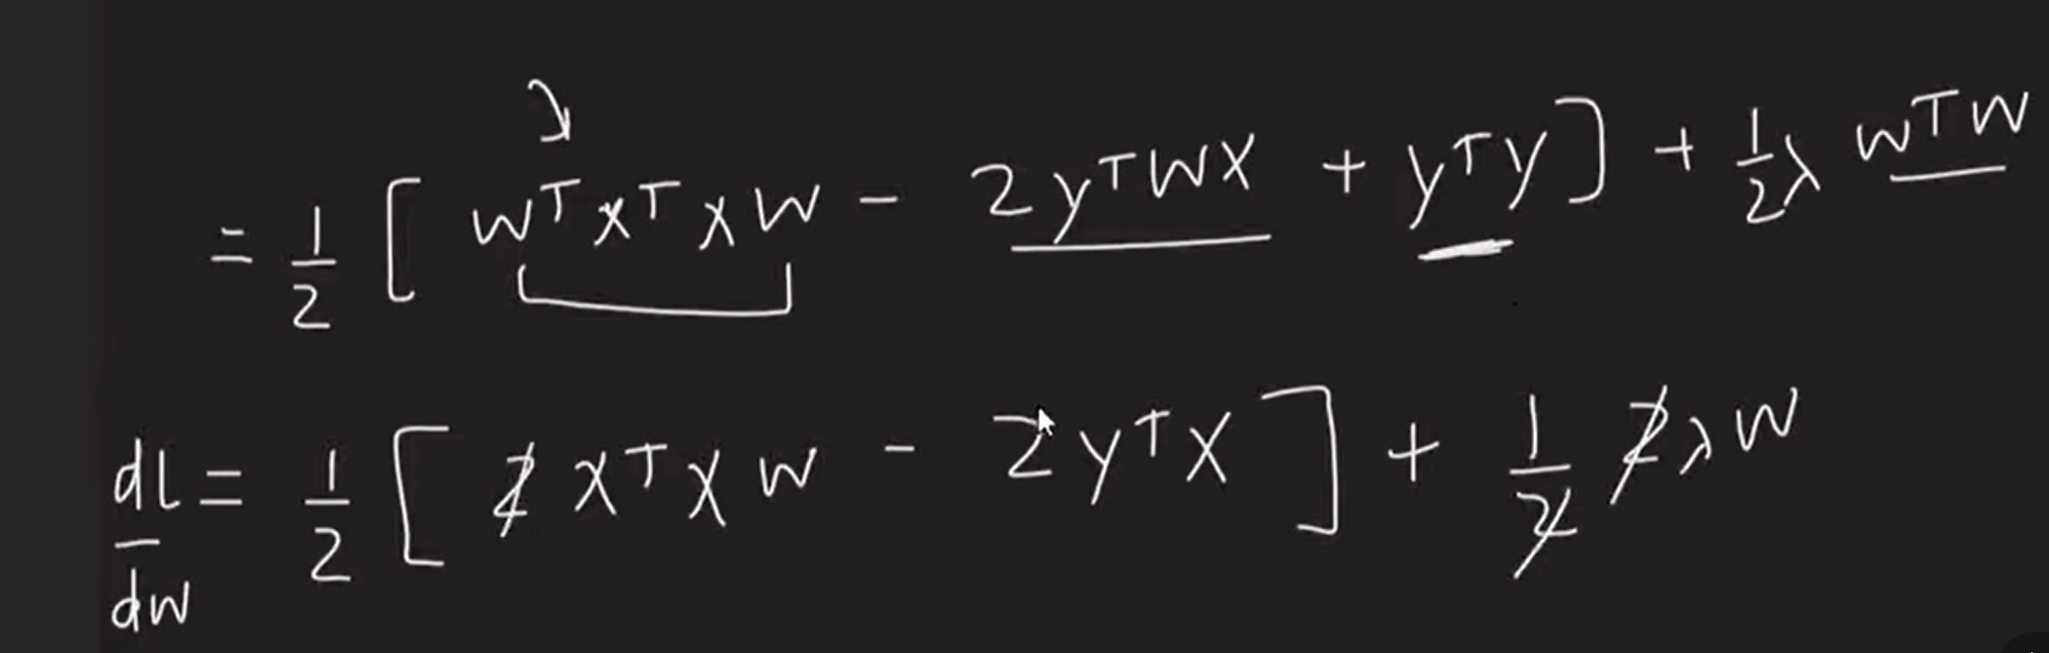

In [4]:
X=data.data
y=data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
lr.coef_ , lr.intercept_

(array([  23.45465406, -247.42747406,  492.1087518 ,  329.35876431,
        -970.79723039,  573.54295519,  182.42162368,  255.92168168,
         794.21609282,   89.32249214]),
 np.float64(152.13623331746496))

In [9]:
y_pred = lr.predict(X_test)

In [10]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [11]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000) #alpha is Lambda 

In [12]:
R.fit(X_train,y_train)
R.coef_ ,R.intercept_

(array([ 0.00260126,  0.00057066,  0.00776597,  0.0060976 ,  0.00233864,
         0.00184724, -0.00513942,  0.0052716 ,  0.00734598,  0.00528629]),
 np.float64(151.83287930791352))

In [13]:
y_pred1=R.predict(X_test)

In [14]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.00042490200441935855
RMSE 70.25956272917782


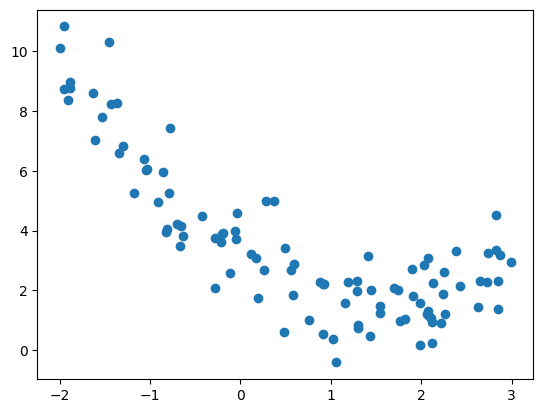

In [15]:
x1 = 5 * np.random.rand(100, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(100, 1)

plt.scatter(x1, x2)
plt.show()

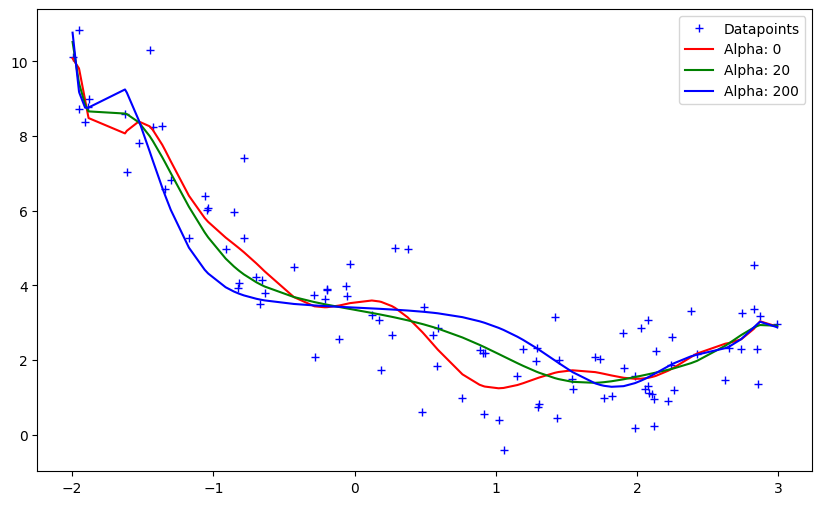

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b'] #overfitting, good, underfitting 

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

# Ridge From Scratch

In [17]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [18]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

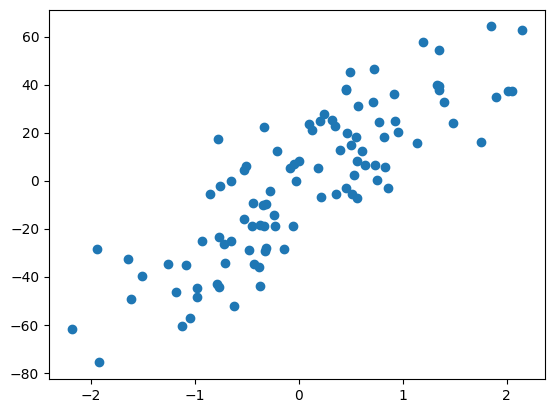

In [19]:
plt.scatter(X,y)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
lr.coef_ , lr.intercept_

(array([27.82809103]), np.float64(-2.29474455867698))

In [21]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
rr.coef_ , rr.intercept_

(array([24.9546267]), np.float64(-2.1269130035235735))

In [22]:
from sklearn.linear_model import Ridge
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
rr1.coef_ , rr1.intercept_

(array([12.93442104]), np.float64(-1.4248441496033308))

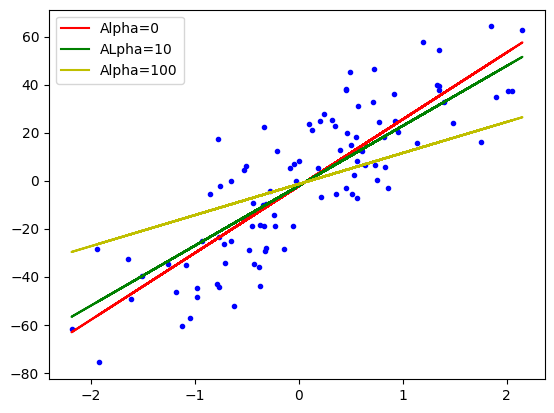

In [23]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),'r-',label='Alpha=0')
plt.plot(X,rr.predict(X),'g-',label='ALpha=10')
plt.plot(X,rr1.predict(X),'y-',label='Alpha=100')
plt.legend()

In [24]:
def linear_regression(X,y,alpha=1):
    x_mean = X.mean()
    y_mean = y.mean()
    
    num = 0
    den = 0

    for i in range(X.shape[0]):
        num = num + (y[i] - y_mean) * (X[i] - x_mean)
        den = den + (X[i] - x_mean) * (X[i] - x_mean)
        
    m = num/(den + alpha)
    b = y_mean - m*x_mean
        
    return m,b

In [25]:
class ridge_regression :
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass

In [26]:
reg = ridge_regression(alpha=100)
reg.fit(X,y)

[12.93442104] [-1.42484415]


now for n-dim data


# Now for N-dim Data -> Cholesky Decomposition

In [27]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [28]:
X,y = load_diabetes(return_X_y=True)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [30]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1 , solver='cholesky')
reg.fit(X_train , y_train)

Ridge(alpha=0.1, solver='cholesky')

In [31]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [32]:
reg.coef_ , reg.intercept_

(array([  44.02063391, -241.69329987,  452.98665299,  332.04420177,
         -76.33686744,  -68.52143809, -164.98809083,  149.96908118,
         431.61347417,   58.51862681]),
 np.float64(150.89053425602808))

In [33]:
class ridge_multi_regression:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1) # intercept(b) 
        I = np.identity(X_train.shape[1])
        I[0][0] = 0 # Wo intercept (b) = no regularization , wi (m)-> regularized normally 
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [34]:
reg = ridge_multi_regression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
reg.coef_ , reg.intercept_

0.4693128853309805


(array([  44.02063391, -241.69329987,  452.98665299,  332.04420177,
         -76.33686744,  -68.52143809, -164.98809083,  149.96908118,
         431.61347417,   58.51862681]),
 np.float64(150.8905342560281))

# With Gradient Descent


In [35]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)
reg.fit(X_train,y_train)

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant', max_iter=500)

In [36]:
y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
reg.coef_ , reg.intercept_

R2 score 0.40104300168510276


(array([  50.37907803, -152.45582499,  359.55262705,  265.82479358,
          -0.36129835,  -54.62577332, -165.27562303,  137.64340618,
         324.64047139,   99.54509582]),
 array([138.76072109]))

In [37]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.001, max_iter=500,solver='sparse_cg')

In [38]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
reg.coef_ , reg.intercept_

R2 score 0.46250101619914563


(array([  34.52192544, -290.84084076,  482.40181344,  368.0678662 ,
        -852.44873179,  501.59160336,  180.11115788,  270.76333979,
         759.73534372,   37.4913546 ]),
 np.float64(151.10198517439466))

In [39]:
class ridge_GD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [40]:
reg = ridge_GD(epochs=500,alpha=0.001,learning_rate=0.005)

In [41]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
reg.coef_ , reg.intercept_

R2 score 0.4738018280260913


(array([  46.65050914, -221.3750037 ,  452.12080647,  325.54248128,
         -29.09464178,  -96.47517735, -190.90017011,  146.32900372,
         400.80267299,   95.09048094]),
 np.float64(150.86975316713472))